#### Confusion matrix

In [1]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")
df_v = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv")
df_predict = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Github/Web-Economics-master/click_pred.csv")

In [4]:
df_log = pd.DataFrame([df_predict[' click'],df_v['click']],index=['Predict','Truth']).transpose()

In [5]:
df_log[(df_log.Predict==1)&(df_log.Truth==1)] # check for accuracy 

,Predict,Truth
2417,1,1
17526,1,1
41277,1,1
55489,1,1
65866,1,1
66087,1,1
134773,1,1
168957,1,1
173489,1,1
177776,1,1


#### Logistic Regression confusion matrix

In [6]:
df_log[(df_log.Predict==0)&(df_log.Truth==1)].shape #Use this to check 

(210, 2)

In [7]:
CM_1 = confusion_matrix(df_log.Truth, df_log.Predict)

In [8]:
CM_1

array([[299328,    195],
       [   210,     16]])

In [9]:
cmap = sns.diverging_palette(200,20, as_cmap=True)

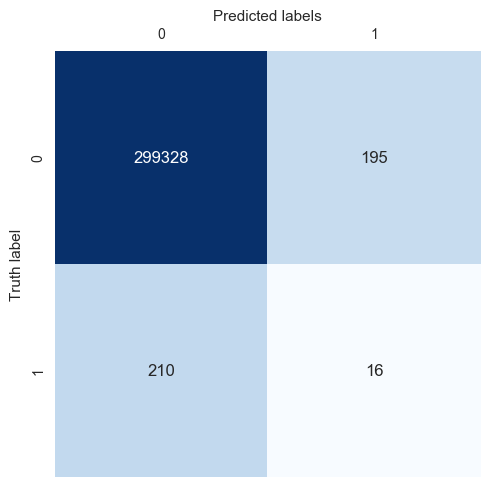

In [10]:
#Change the colour if you want 
ax = sns.heatmap(CM_1, vmax = 750, annot= True,fmt="d", cbar= False, square=True, cmap='Blues')
ax.xaxis.tick_top()
ax.set_xlabel('Predicted labels') 
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Truth label')  

#### Random forest classifier - acc_df restore

In [11]:
%store -r

In [12]:
%store

Stored variables and their in-db values:
acc_df               ->         Predict  Test
0           0.0   0.0
1     
graph_df             ->      Bid_value  Clicks  Impressions_won  Win_ratio


#### Random forest dataframe

In [13]:
acc_df.head()

,Predict,Test
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [14]:
acc_df.columns= ['Predict','Truth']

In [15]:
acc_df[(acc_df.Predict==0)&(acc_df.Truth==1)].shape #Use this to check 

(195, 2)

In [16]:
CM_2 = confusion_matrix(acc_df.Truth, acc_df.Predict)

In [17]:
CM_2

array([[298999,    524],
       [   195,     31]])

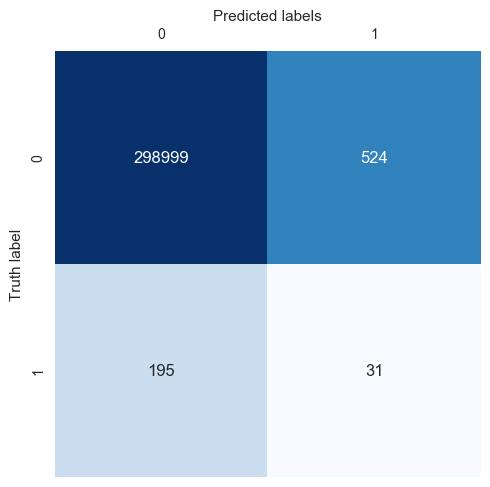

In [18]:
#Change the colour if you want 
ax2 = sns.heatmap(CM_2, vmax = 750, annot= True,fmt="d", cbar= False, square=True, cmap='Blues')
ax2.xaxis.tick_top()
ax2.set_xlabel('Predicted labels') 
ax2.xaxis.set_label_position('top') 
ax2.set_ylabel('Truth label')  

#### Plotting them together

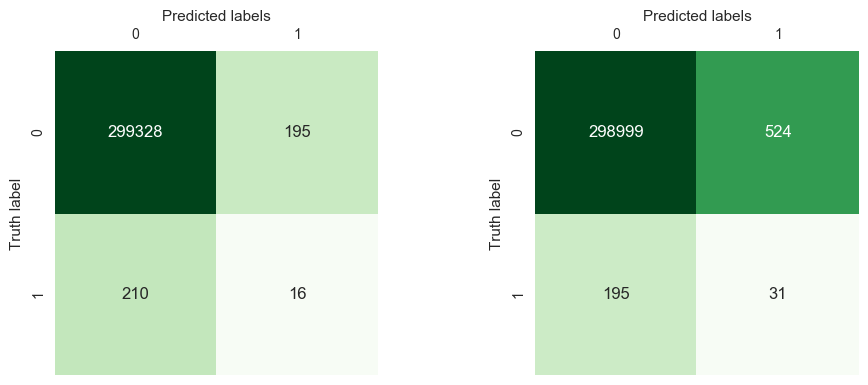

In [19]:
fig_heat ,(axes1, axes2) = plt.subplots(ncols= 2, figsize=(10,4))

ax = sns.heatmap(CM_1, vmax = 750, annot= True,fmt="d", cbar= False, square=True, cmap='Greens',ax=axes1)
ax.xaxis.tick_top()
ax.set_xlabel('Predicted labels') 
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Truth label')  

ax2 = sns.heatmap(CM_2, vmax = 750, annot= True,fmt="d", cbar= False, square=True, cmap='Greens', ax= axes2)
ax2.xaxis.tick_top()
ax2.set_xlabel('Predicted labels') 
ax2.xaxis.set_label_position('top') 
ax2.set_ylabel('Truth label')  

plt.tight_layout()

#Save image
#plt.savefig('Heatmap-classifiers.jpg',bbox_inches='tight')

#### Precision / recall and F1

In [38]:
CM_1.sum(axis=1)[1]

226

In [22]:
CM_1

array([[299328,    195],
       [   210,     16]])

In [51]:
f1_score(df_log.Truth, df_log.Predict)

0.073226544622425629

In [52]:
# 1 )Logistic regression
print (CM_1[1][1] / CM_1.sum(axis=0)[1] )  #Precision  
print (CM_1[1][1] / CM_1.sum(axis=1)[1] )  #Recall 
print (f1_score(df_log.Truth, df_log.Predict)) #F1 score

0.0758293838863
0.070796460177
0.0732265446224


In [54]:
# 2 )Random Forest
print (CM_2[1][1] / CM_2.sum(axis=0)[1] )  #Precision  
print (CM_2[1][1] / CM_2.sum(axis=1)[1] )  #Recall 
print (f1_score(acc_df.Truth, acc_df.Predict)) #F1 score

0.0558558558559
0.137168141593
0.0793854033291


In [ ]:
CM_2[1][1] / CM_2.sum(axis=0)[1]   #Precision - 2 )Random forest

In [62]:
F1_scores1 = pd.DataFrame( ['Logistic regression',0.0758293838863,0.070796460177,0.0732265446224], index=['Classifier','Precision','Recall','F1_Score']).transpose()

In [86]:
F1_scores2 = pd.DataFrame(['Random Forest',0.0558558558559,0.137168141593,0.0793854033291],index=['Classifier','Precision','Recall','F1_Score']).transpose()

In [87]:
F1_scores = pd.concat([F1_scores1,F1_scores2]).reset_index(drop=True)

In [94]:
F1_scores= F1_scores[['Classifier','Precision','Recall','F1_Score']].apply(pd.to_numeric, errors='ignore').round(3)

In [95]:
F1_scores

,Classifier,Precision,Recall,F1_Score
0,Logistic regression,0.076,0.071,0.073
1,Random Forest,0.056,0.137,0.079


In [96]:
print(F1_scores.round(3).to_latex(index = False))

\begin{tabular}{lrrr}
\toprule
          Classifier &  Precision &  Recall &  F1\_Score \\
\midrule
 Logistic regression &      0.076 &   0.071 &     0.073 \\
       Random Forest &      0.056 &   0.137 &     0.079 \\
\bottomrule
\end{tabular}



In [53]:
acc_df

,Predict,Truth
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
